In [1]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess

####Set up network weights
# W = np.array([[16., -12.], [16., -5.]])
# pos = 12
# neg = -3
# W = np.array([[pos, 0, neg], [0, pos, neg], [neg, neg, 0]])

a = 16
b = 12
d = 4
e = -2
W = np.array([[a, e, e, -b, 0, 0], [e, a, e, 0, -b, 0], [e, e, a, 0, 0, -b],
              [a, 0, 0, -d, e, e], [0, a, 0, e, -d, e], [0, 0, a, e, e, -d]])

# W = np.array([[a, e, -b, e], [e, a, e, -b],
#               [a, e, -d, e], [e, a, e, -d]]) 

# W = array([[ a, -b,    -d],
#            [ a,  -d ,  -d],
#            [ d,  -d,   d]])
# W = np.zeros((N,N))

N = W.shape[0]
#rand pert
gamma = 0
W = W + gamma*(np.random.random((N,N))-.5)

In [2]:
# plt.imshow(W)

In [3]:
W
# WN3_2orbits = W
# WN3_1orbit = W

array([[ 16.,  -2.,  -2., -12.,   0.,   0.],
       [ -2.,  16.,  -2.,   0., -12.,   0.],
       [ -2.,  -2.,  16.,   0.,   0., -12.],
       [ 16.,   0.,   0.,  -4.,  -2.,  -2.],
       [  0.,  16.,   0.,  -2.,  -4.,  -2.],
       [  0.,   0.,  16.,  -2.,  -2.,  -4.]])

In [4]:
#make file to simulate Wilson-Cowan network with XPP
ps = [-1,-1,-4,-4]
ps = [-1,-1,-1,-4,-4,-4]
# ps = [-1,-4,-4]
eqstring = ''
wi = 0
for i in range(1,W.shape[0]+1):
    eqstring+='x'+str(i)+"'=-x"+str(i)+"+f("+'w'+str((i-1)*N+i-1)+"*x"+str(i)+'+p%s+'%(i)#+'-b*y'+str(i)
    for j in range(1,W.shape[1]+1):
        if i!=j:
            eqstring+='w'+str(wi)+"*x"+str(j)+'+'
        wi+=1
    eqstring=eqstring[:-1]+')\n'
    
# wi = 0
# for i in range(1,W.shape[0]+1):
#     eqstring+='y'+str(i)+"'=(-y"+str(i)+"+f(c*x"+str(i)+'+q+'#+'-d*y'+str(i)
#     for j in range(1,W.shape[1]+1):
#         if i!=j:
#             eqstring+='w'+str(wi)+"*y"+str(j)+'+'
#         wi+=1
#     eqstring=eqstring[:-1]+'))/tau\n'

weighstring = 'p '
wi=0
for i in range(0,W.shape[0]):
    for j in range(0,W.shape[1]):
        weighstring+='w'+str(wi)+'='+str(round(W[i,j], 2))+','
        wi+=1
        
inputstring = 'par '
for i in range(0,W.shape[0]):
    inputstring+='p'+str(i+1)+'='+str(ps[i])+','
        
initstring = 'init '
inits = [0.]*N#np.random.rand(2*N)
for i in range(W.shape[0]):
        initstring+='x'+str(int(i+1))+'='+str(inits[i])+','
        
# for i in range(W.shape[0]):
#         initstring+='y'+str(i+1)+'='+str(inits[N+i])+','

wcstring = "# the wilson-cowan equations\n"
wcstring += "f(u)=1/(1+exp(-u))\n"
wcstring += eqstring[:-1] + "\n"
wcstring += weighstring[:-1] + "\n"
wcstring += inputstring[:-1] + " \n"
wcstring += initstring[:-1] + "\n"
wcstring += '@ xp=x1,yp=x2,xlo=-.125,ylo=-.125,xhi=1,yhi=1\n'
wcstring += "done"
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)

In [5]:
#Simulate network with two initial values
# time=2000
# inits = [0.4, 0.15, 0.91, 0.58, 0.84, 0.29]
# #N=6
# inits = [0.63171527, 0.6770133,  0.20366578, 0.79692421, 0.9556654,  0.18943411]
# inits_dict={}
# for i,init in enumerate(inits[:int(N)]):
#     inits_dict['x'+str(i+1)]=init
# for i,init in enumerate(inits[int(N):]):
#     inits_dict['y'+str(i+1)]=init
# npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)

# inits = [0.75, 0.11, 0.04, 0.95, 0.57, 0.64]
# inits = [0.10025542, 0.67131615, 0.56472044, 0.58700333, 0.71130977, 0.63913538]
# inits_dict={}
# for i,init in enumerate(inits[:int(N)]):
#     inits_dict['x'+str(i+1)]=init
# for i,init in enumerate(inits[int(N):]):
#     inits_dict['y'+str(i+1)]=init
# npa2, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)

In [6]:
# npa = np.loadtxt("npa1_WCD3.txt", delimiter=',')
# npa2 = np.loadtxt("npa2_WCD3.txt", delimiter=',')

In [7]:
# shift=19500
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(npa[shift:,1], npa[shift:,2], npa[shift:,3], '.')
# plt.show()

In [8]:
M = N
dim, low, high, delta = M, 0., 1., .5
grid = cf.make_grid(dim, low, high, delta)
print(len(grid))

729


In [9]:
# time=500
# datas = np.zeros((len(grid), 2*time*10+1, N))
# data_length_list = []
# for j, gc in enumerate(grid):
#     inits = gc
#     inits_dict={}
#     for i,init in enumerate(inits[:N]):
#         inits_dict['x'+str(i+1)]=init
#     npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#     datas[j, :, :] = npa[:,1:].copy()
#     data_length_list.append(npa[:,1:].shape[0])

In [10]:
# colors = ['b', 'g', 'r', 'c', 'm', 'y']
# shift=1900
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for j in range(len(grid)):
#     ax.plot(datas[j,shift:,0], datas[j,shift:,1], datas[j,shift:,2], '.', c=colors[j%M], label=j)
# # plt.legend()
# plt.show()

In [23]:
time=500
P = 10
datas = np.zeros((P, 2*time*10+1, N))
data_length_list = []
for j in range(P):
    inits = np.random.rand(N)
    print(j, inits)
    inits_dict={}
    for i,init in enumerate(inits[:int(N)]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()
    data_length_list.append(npa[:,1:].shape[0])

0 [0.03690518 0.87412553 0.0866474  0.56981889 0.64043855 0.94648472]
1 [0.05984313 0.37198852 0.44420056 0.35096017 0.99443698 0.79496978]
2 [0.18193634 0.33857121 0.18164384 0.52066031 0.21598693 0.95832437]
3 [0.25052758 0.53354892 0.43085817 0.43281011 0.69857167 0.25116688]
4 [0.65431898 0.82807185 0.95792877 0.80026787 0.18142956 0.80635634]
5 [0.30349931 0.22858664 0.84092542 0.8646456  0.01642161 0.0603259 ]
6 [0.56328933 0.10305845 0.37529014 0.88582491 0.09297225 0.89264501]
7 [0.07181195 0.90806524 0.9099641  0.42255029 0.8474894  0.68414225]
8 [0.18917905 0.19058014 0.7403125  0.57666575 0.72309087 0.69267426]
9 [0.5801547  0.37395044 0.48899496 0.84291134 0.26293018 0.32184448]


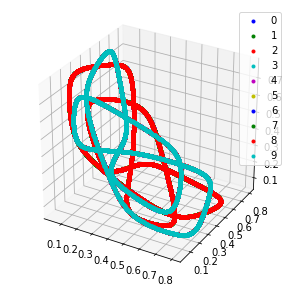

In [26]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
shift=int(time*10.)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(P):
    ax.plot(datas[j,shift:,0], datas[j,shift:,1], datas[j,shift:,2], '.', c=colors[j%6], label=j)
plt.legend()
plt.show()

In [13]:
print(npa[-1,1:])
1/(1+exp(1))

[0.11486856 0.75174254 0.28889075 0.23313634 0.63722402 0.08148786]


0.2689414213699951

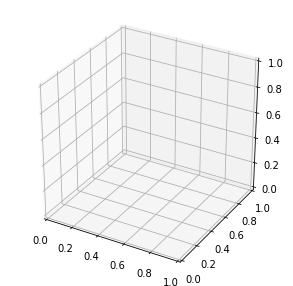

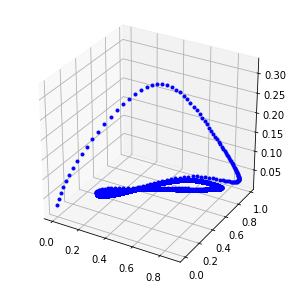

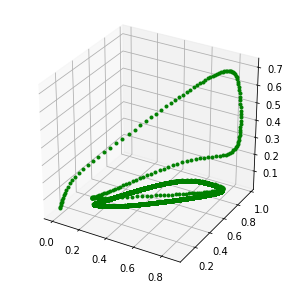

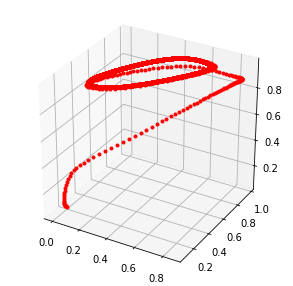

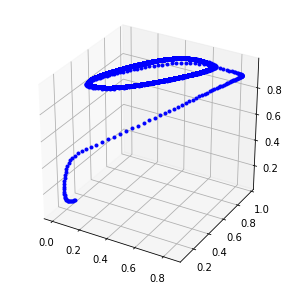

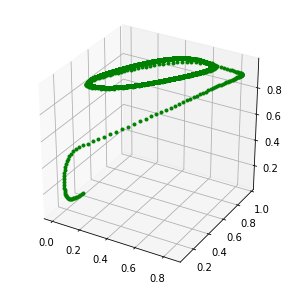

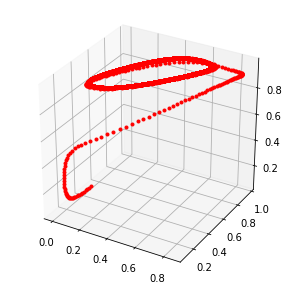

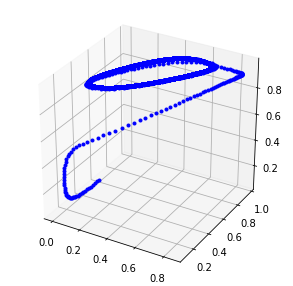

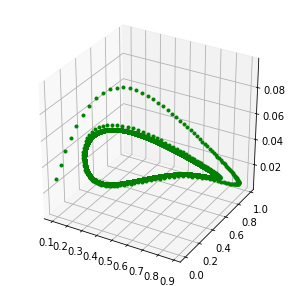

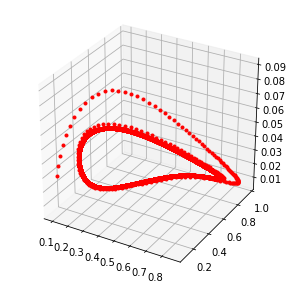

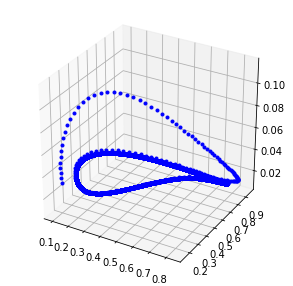

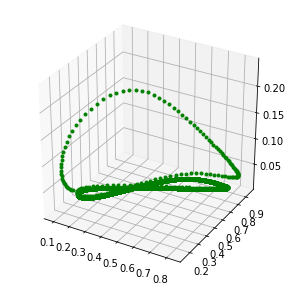

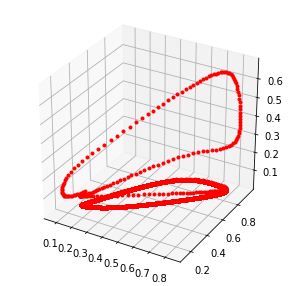

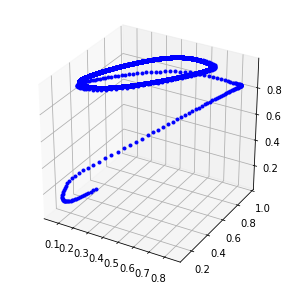

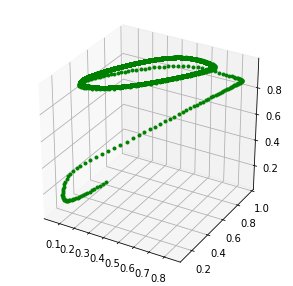

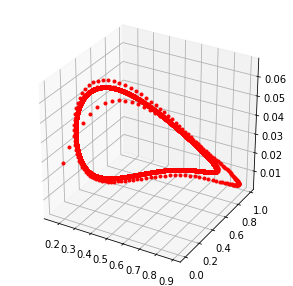

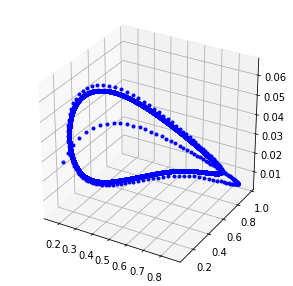

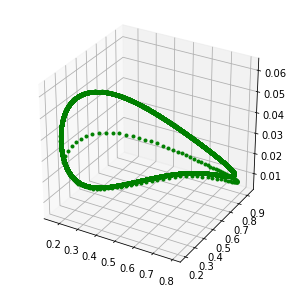

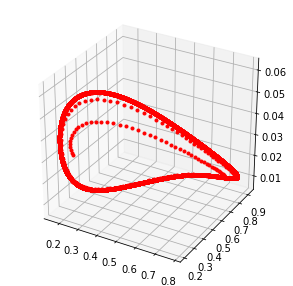

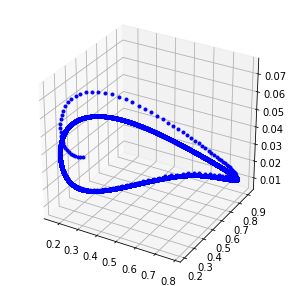

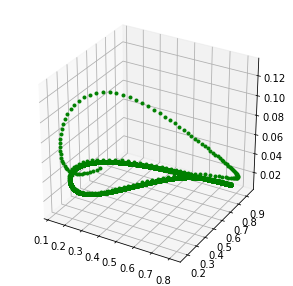

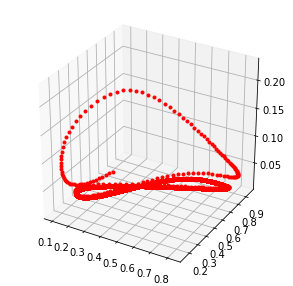

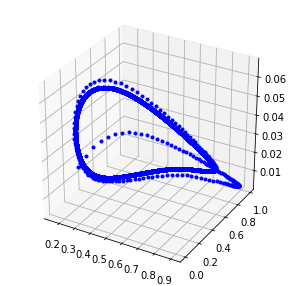

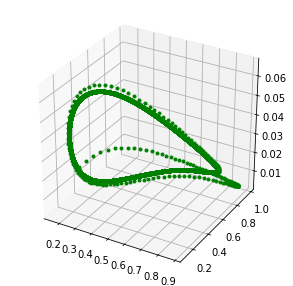

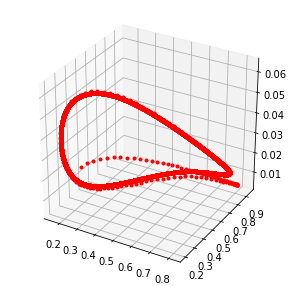

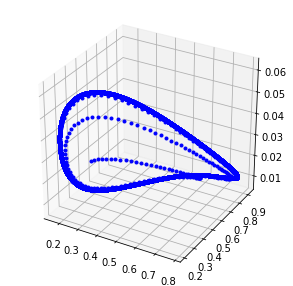

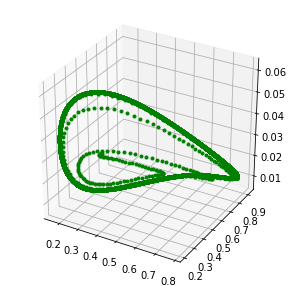

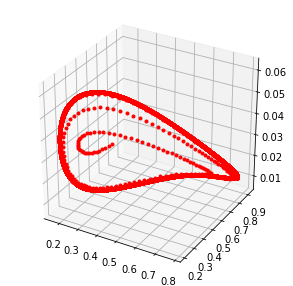

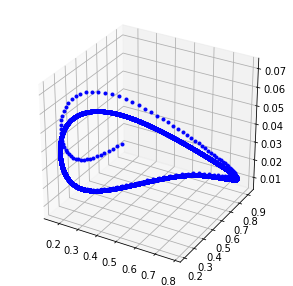

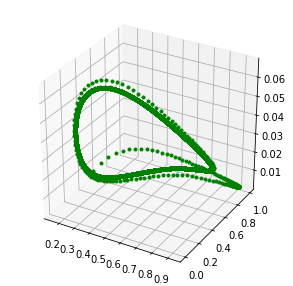

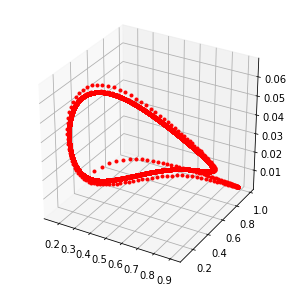

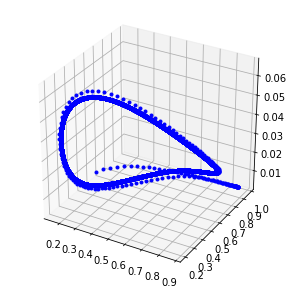

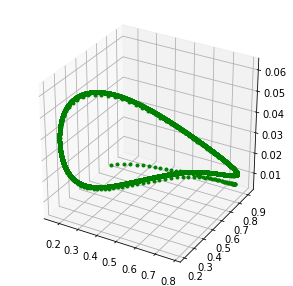

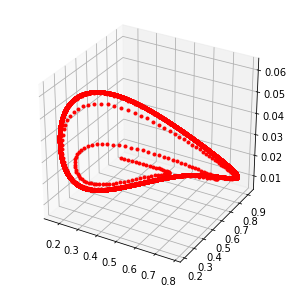

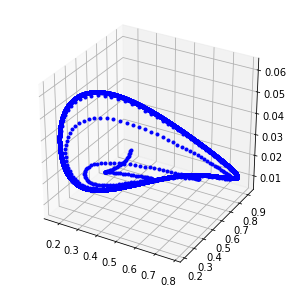

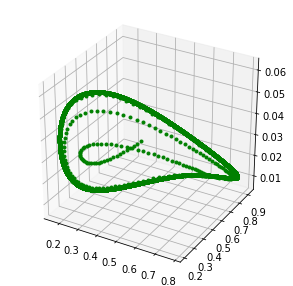

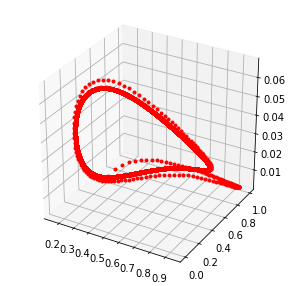

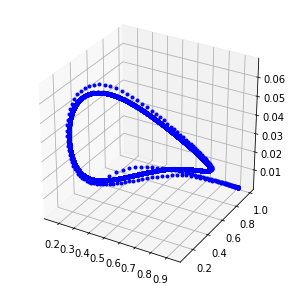

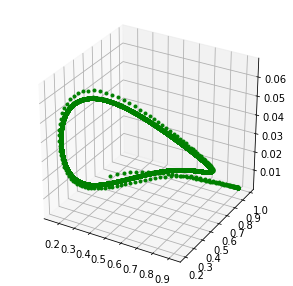

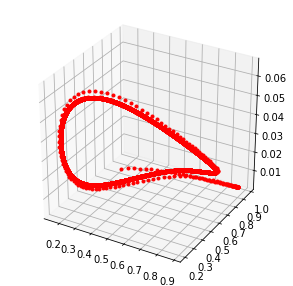

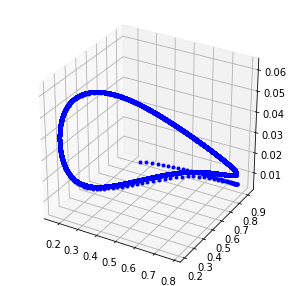

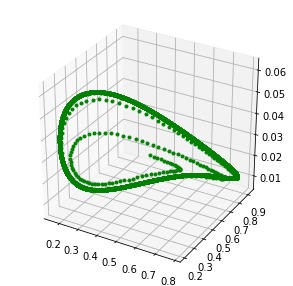

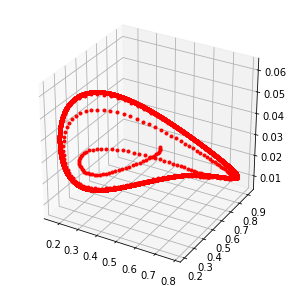

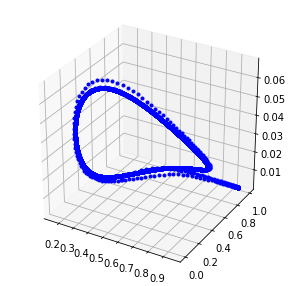

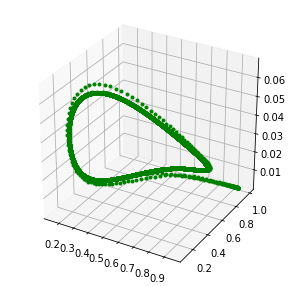

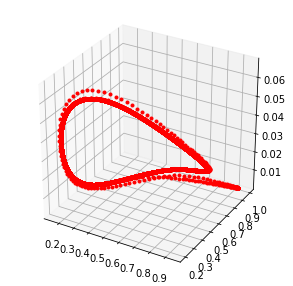

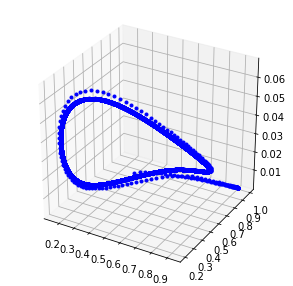

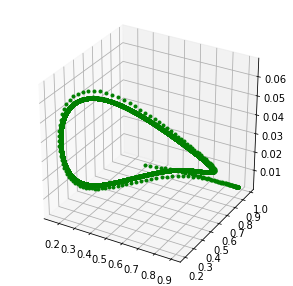

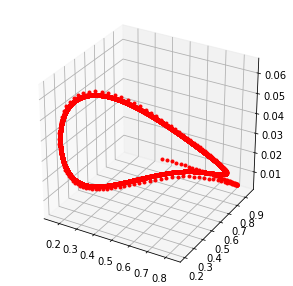

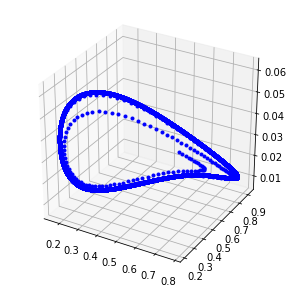

IndexError: index 49 is out of bounds for axis 0 with size 49

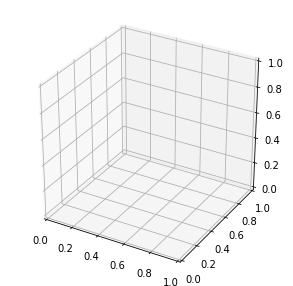

In [857]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
shift=int(time*0.)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(P):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(datas[j,shift:,0], datas[j,shift:,1], datas[j,shift:,2], '.', c=colors[j%M], label=j)
    plt.show()

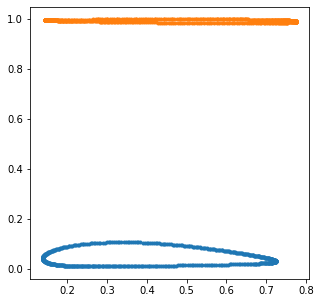

In [732]:
shift=int(time*19.)
fig = plt.figure(figsize=(5,5))
plt.plot(datas[j,shift:,0], datas[j,shift:,2], '.')
plt.plot(datas[j-1,shift:,0], datas[j-1,shift:,2], '.')
plt.show()

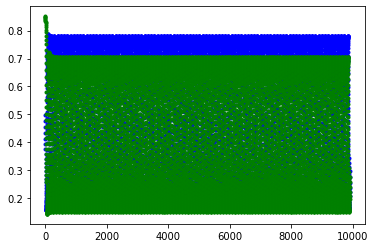

In [838]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
fig = plt.figure()
for j in range(2):
    plt.plot(range(datas[j,100:,0].shape[0]), datas[j,100:,0], '.', c=colors[j%M], label=j)
plt.show()

In [977]:
dim, low, high, delta = 3, -1., 1.1, .5
grid = cf.make_grid(dim, low, high, delta)
print(len(grid))

125


In [978]:
time=5
datas = np.zeros((len(grid), 2*time*10+1, N))
data_length_list = []
for j, gc in enumerate(grid):
    inits = gc
    inits_dict={}
    for i,init in enumerate(inits[:3]):
        inits_dict['x'+str(i+1)]=init#+np.random.rand()/10
#     inits_dict['x'+str(3)]=0.01
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()
    data_length_list.append(npa[:,1:].shape[0])

<IPython.core.display.Javascript object>


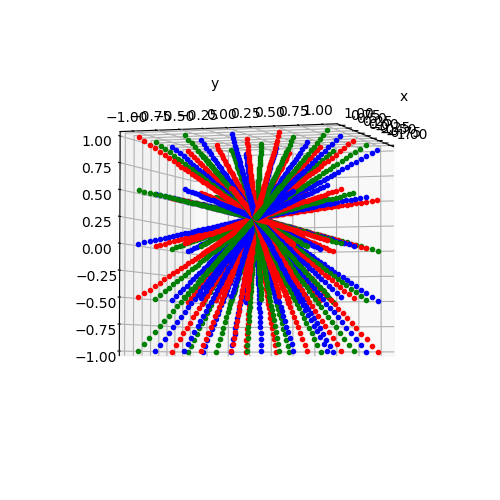

In [979]:
%matplotlib notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y']
shift=int(time*0.)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(datas.shape[0]):
    ax.plot(datas[j,shift:,0], datas[j,shift:,1], datas[j,shift:,2], '.', c=colors[j%M], label=j)
# plt.legend()
plt.xlabel("x")
plt.ylabel("y")
# plt.zlabel("z")
plt.show()

In [938]:
npa[-100:,1:]

array([[0.18718694, 0.37633601, 0.01207293],
       [0.18187806, 0.36119109, 0.01335802],
       [0.17718665, 0.34673548, 0.01477391],
       [0.1731203 , 0.33295608, 0.01632501],
       [0.16969131, 0.31984067, 0.01801503],
       [0.16691765, 0.3073782 , 0.01984685],
       [0.16482396, 0.2955595 , 0.02182229],
       [0.16344285, 0.28437802, 0.02394188],
       [0.1628166 , 0.27383068, 0.02620455],
       [0.16299923, 0.26391897, 0.02860715],
       [0.164059  , 0.25465038, 0.03114399],
       [0.16608152, 0.2460406 , 0.03380613],
       [0.16917315, 0.2381161 , 0.03658055],
       [0.1734648 , 0.23091832, 0.03944908],
       [0.17911491, 0.22450903, 0.04238716],
       [0.18631032, 0.21897829, 0.04536241],
       [0.19526209, 0.2144549 , 0.04833313],
       [0.20619102, 0.21111992, 0.051247  ],
       [0.21929732, 0.20922123, 0.05404048],
       [0.23471107, 0.20908396, 0.05663969],
       [0.25243074, 0.21110491, 0.05896374],
       [0.27227506, 0.21571454, 0.06093113],
       [0.

In [268]:
#put data in format for Combinatorial Dynamical System
# hdata = np.array([npa[shift:,1:5], npa2[shift:,1:5]])
shift = 30000
# hdata = np.array([npa[shift:,1:], npa2[shift:,1:]])
print(hdata.shape)

hdata = np.reshape(hdata, (hdata.shape[0]*hdata.shape[1], hdata.shape[2]))
data_length_list = [npa.shape[0], npa2.shape[0]]
data_length_list = [npa[shift:,1:].shape[0], npa2[shift:,1:].shape[0]]

(2,)


IndexError: tuple index out of range

In [88]:
#Make combinatorial dynamical system from the data
hdatas = datas[:1,5000:,:3]
hdatas = hdatas.reshape((hdatas.shape[0]*hdatas.shape[1], hdatas.shape[2]))
nbins = 2**7
delta = 1/nbins
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas[:,:], nbins, data_length_list, 1.)

In [89]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

1

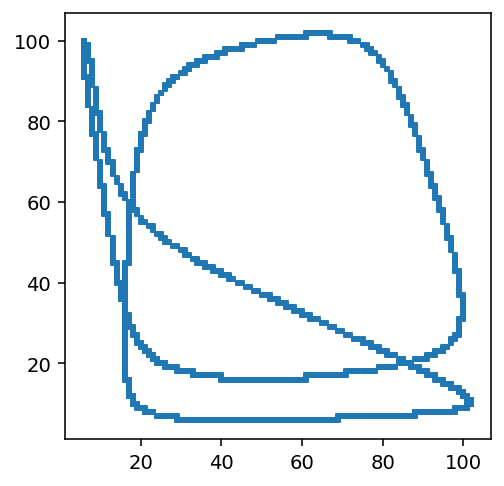

In [90]:
fig, ax = plt.subplots(dpi=141)
for i in range(len(RCs)):
    
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,1]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [91]:
RCs = cds.get_recurrent_components(includeselfedges=True)

RPcubes = {}

for i in range(0,len(RCs)):#range(0,1)
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(RCs[i])
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    Nbhd = RPcubes[i][0]
    print("Finding isolated nbhd")
    S = cds.invariantPart(Nbhd)
    M = cds.cubical_wrap(S).intersection(cds.G.nodes())
    for mstep in range(2):
        M = cds.cubical_wrap(M).intersection(cds.G.nodes())
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
#             print("           "+line.rstrip().decode('UTF-8'))
            if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
        if e=='too many values to unpack (expected 4)':
            print('Faile')
        else:
            print(e)

Component 1
Finding isolated nbhd
Calculating index pair
Calculating homology
           H_0 = Z^11
           H_0 = Z
           H_1 = Z
           Dim 0:	f (x1) = y1
           	f (x2) = y1
           	f (x3) = y1
           	f (x4) = y1
           	f (x5) = y1
           	f (x6) = y1
           	f (x7) = y1
           	f (x8) = y1
           	f (x9) = y1
           	f (x10) = y1
           	f (x11) = y1
           Dim 0:	i (x1) = y1
           	i (x2) = y1
           	i (x3) = y1
           	i (x4) = y1
           	i (x5) = y1
           	i (x6) = y1
           	i (x7) = y1
           	i (x8) = y1
           	i (x9) = y1
           	i (x10) = y1
           	i (x11) = y1
